<a href="https://colab.research.google.com/github/deanhoperobertson/NLP-Text-Classifiation-/blob/master/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wording Embeddings

In [0]:
import urllib.request
import pandas as pd
import urllib
from sklearn import model_selection, preprocessing

from matplotlib import pyplot
%matplotlib inline

#Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#keras
from keras.preprocessing.text import Tokenizer

#embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import multiprocessing

In [0]:
#import data from my github repo
url = "https://raw.githubusercontent.com/deanhoperobertson/NLP-Text-Classifiation-/master/corpus.txt"
data = urllib.request.urlopen(url).read()
data = data.decode('utf-8')

In [0]:
labels, texts = [], []
for i, line in enumerate(str(data).split("\n")):
    content = line.replace("\\","").split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [0]:
#split into train and test set (default is 25%)
#set seed for consistency
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'], test_size=0.25, random_state=1)

# encode target labels into intergers between 0 - no.classes
# label 2 = 1
# label 1 = 0
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [0]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [143]:
model_1 = Word2Vec(sentences, min_count=1)
#Lenth of the courpus 
total_examples = model_1.corpus_count
model_1.train(sentences, total_examples=total_examples,epochs=30)
print(model_1)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [144]:
# summarize vocabulary
words = list(model_1.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [145]:
# access vector for one word
print(model_1['sentence'])

[-4.5616538e-03 -3.5043543e-03  4.6407892e-03 -4.7894320e-03
 -2.9296484e-03 -4.9965964e-03 -4.5858347e-03 -3.3215433e-03
  3.0181692e-03 -1.7097431e-04 -2.2017050e-03 -2.9504031e-03
  4.9764155e-03 -2.0334334e-03 -5.9823372e-04 -3.4317195e-03
 -4.7169062e-03 -1.5823708e-03 -1.4801420e-03  2.2142655e-03
  3.3689253e-03  4.3597613e-03 -3.5727848e-03  4.4204639e-03
 -7.3733070e-04 -2.2555748e-03  2.4632353e-03 -4.5867520e-03
 -4.2769727e-03  1.5275608e-03  4.8271972e-03  9.2768803e-04
 -3.1632578e-04 -2.7968029e-03 -2.2391409e-03  2.5311972e-03
 -1.8731136e-03  2.4978877e-03 -2.8009696e-03 -2.7569276e-03
  3.0212663e-03  2.1669432e-03 -8.3960616e-04 -1.2608864e-03
  3.9878688e-03 -1.3145262e-03 -1.3866167e-03 -1.9657998e-03
  3.3442534e-03 -8.9014752e-04 -4.9227979e-03 -4.7888756e-03
  2.2845627e-03 -2.5202462e-04  4.5613893e-03  8.5209898e-04
  6.1159808e-04 -3.7199126e-03  1.4704722e-03  8.5877975e-05
  6.8244082e-04 -2.6223918e-03 -4.3502334e-03 -3.9973240e-03
  5.2587042e-04  3.55979

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## Vizualize the Word Embeddings

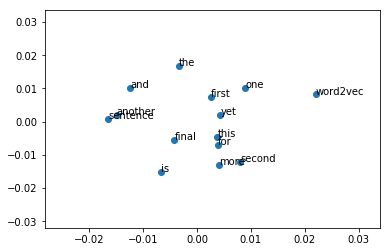

In [146]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()